## Importing the Numpy Library

In the following line, we import the Numpy library and give it the nickname 'np' to make it easier to use. 

In [2]:
import numpy as np

In the following code, we use Numpy's np.array() function to create a 3x3 matrix and then print it. 

What is a Matrix?

Matrix is like a grid of numbers. For instance, in many AI applications, image data are stored in the form of matrices. In the follwing you see a very simple 3 by 3 matrix. why it is called 3 by 3 matrix? 

This is because it has 3 rows and 3 columns. 

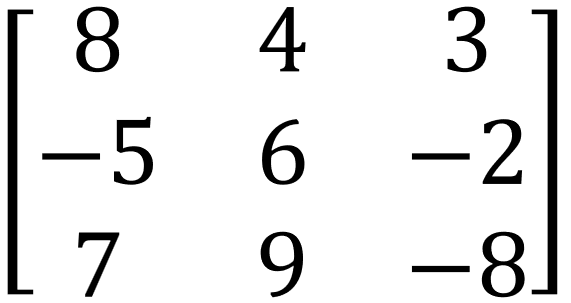


Now lets see how to create this matrix in python.

In a matrix, each horizontal line of numbers is called a "row." In our example, we have three rows: [8, 4, 3], [-5, 6, -2], and [7, 9, -8]. 

The outer square brackets [] represent different rows, and within each pair of square brackets, the comma ',' separates the individual elements in that row.

Similarly, the commas help us separate the values within each row, creating a structured grid of numbers, which is what makes up our 3x3 matrix.

In [2]:
# Create a 3x3 matrix
matrix = np.array([[8, 4, 3], [-5, 6, -2], [7, 9, -8]])
print(matrix)

[[ 8  4  3]
 [-5  6 -2]
 [ 7  9 -8]]


Now lets see how to add two matrices. 

In this part of the code, first we're creating two 3x3 matrices: matrix1 and matrix2.

In the third line of this code, we're adding 'matrix1' and 'matrix2' together using the '+' operator. 

When we add matrices, we add each corresponding element (number) together as you can see here:

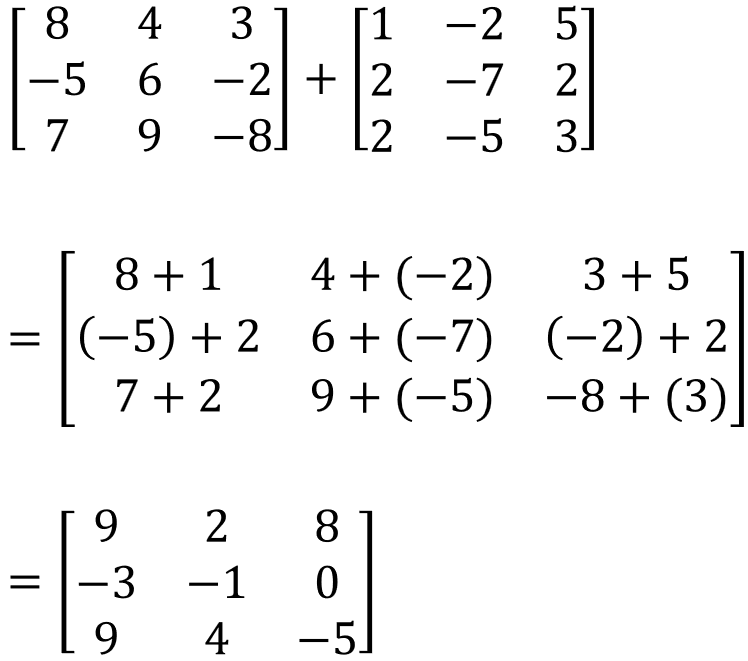

So, in result1, the number at the first row and first column is the sum of the numbers at the same position in matrix1 and matrix2, and so on for all the other elements.

Similarly the Matrix substraction can be performed using the '-' operator. 

In [3]:
# Matrix Addition
matrix1= np.array([[8, 4, 3], [-5, 6, -2], [7, 9, -8]])
matrix2 = np.array([[1, -2, 5], [2, -7, 2],[2, -5, 3]])
result1 = matrix1 + matrix2
print("Matrix Addition Results")
print(result1)

Matrix Addition Results
[[ 9  2  8]
 [-3 -1  0]
 [ 9  4 -5]]


Here, we perform elementwise matrix multiplication between matrix1 and matrix2 using '*' operator. 

Element-wise multiplication means that we multiply each corresponding element in matrix1 by the corresponding element in matrix2. 

It's like multiplying each number in one matrix by the number in the same position in the other matrix as illustrated in the example below.

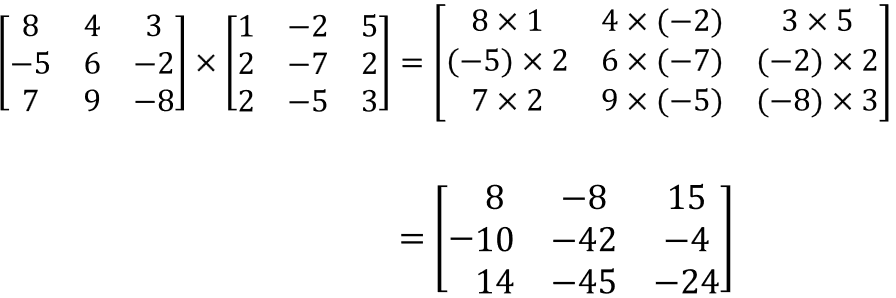

In [4]:
# Perform element-wise matrix multiplication
result2 = matrix1*matrix2
print("Matrix Multiplication Results")
print(result2)

Matrix Multiplication Results
[[  8  -8  15]
 [-10 -42  -4]
 [ 14 -45 -24]]


In this part of the code, we're performing element-wise matrix division between matrix1 and matrix2 using np.divide(). 

Element-wise division means that we divide each corresponding element in matrix1 by the corresponding element in matrix2 as illustrated in the example below. 

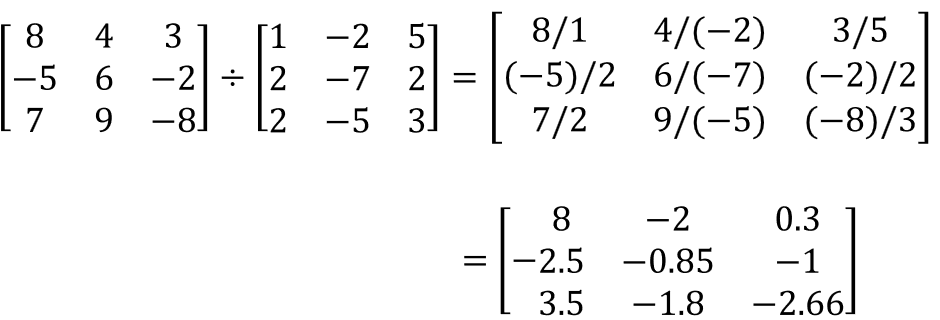

It's like dividing each number in one matrix by the number in the same position in the other matrix.

In [6]:
# Perform element-wise matrix division
result3 = np.divide(matrix1, matrix2)
print("Element-wise Matrix Division ReSults")
print(result3)

Element-wise Matrix Division ReSults
[[ 8.         -2.          0.6       ]
 [-2.5        -0.85714286 -1.        ]
 [ 3.5        -1.8        -2.66666667]]


Here, in this code we're printing the number located at row 0 (the first row) and column 1 (the second column) of the matrix. 

In this case, it's the number 4. 

We use this kind of indexing to pick out individual numbers from the matrix when we need to work with them separately. 

In [5]:
# Indexing
matrix1= np.array([[8, 4, 3], [-5, 6, -2], [7, 9, -8]])
print(matrix[0, 1])  # Access element at row 0, column 1


4


Note: Take an image matrix and take a portion of it for analysis, then relate to the slicing.

Here, in this code we're using slicing to create a new matrix called sub_matrix. 

The first '0:3' inside the square brackets [] means "rows 0 to 2." and 1:3 means "columns 1 to 2." 

When we print sub_matrix, it will show us the part of the original matrix where we sliced.

It lets AI algorithms examine and manipulate a particular section of data without altering the entire dataset, making it a powerful tool for pinpointing and processing essential information in tasks like image recognition or text analysis.

In [11]:
matrix1= np.array([[8, 4, 3], [-5, 6, -2], [7, 9, -8]])

# Slicing
sub_matrix = matrix[0:3, 1:3]  # Slice rows and columns 1 to 2
print(sub_matrix)

[[ 4  3]
 [ 6 -2]
 [ 9 -8]]


Here, we're using a function called np.square() to do something special to each number in the matrix.

In this case, we're squaring each number, which means multiplying it by itself. 

This kind of operation is often used in AI to prepare and transform data before feeding it into AI models.

In [ ]:
# Applying functions to all elements
matrix1= np.array([[8, 4, 3], [-5, 6, -2], [7, 9, -8]])
square_matrix = np.square(matrix)
print(square_matrix)


[[64 16  9]
 [25 36  4]
 [49 81 64]]


Need to relate to the week 5 of the program and show the flatterning part.

Here, we're using a method called flatten() function to transform our matrix into a 1D array. 

It's like taking all the numbers from the matrix and putting them in a single line, one after the other as shown in the example below:

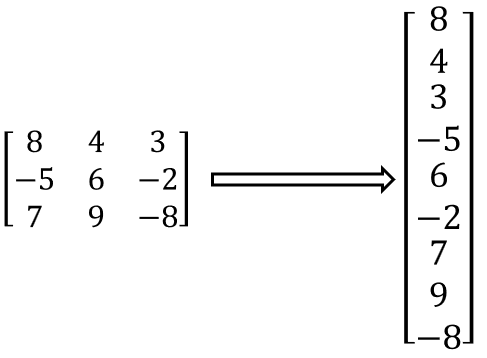

In Neural networks, flattening the input data is like ensuring that each neuron in the model gets its own piece of data, allowing the model to process and learn from information more effectively

Now, let's print the original matrix and the flattened array.

In [4]:
Note:Here also please make sure you take the week 5 and relate to it
    
matrix1= np.array([[8, 4, 3], [-5, 6, -2], [7, 9, -8]])

# Flattening the matrix
flattened_array = matrix1.flatten()

print("Original Matrix:")
print(matrix1)

print("\nFlattened Array:")
print(flattened_array)

<class 'SyntaxError'>: invalid syntax (<ipython-input-4-e18e2a2c1de4>, line 1)

Width: 250 pixels
Height: 167 pixels


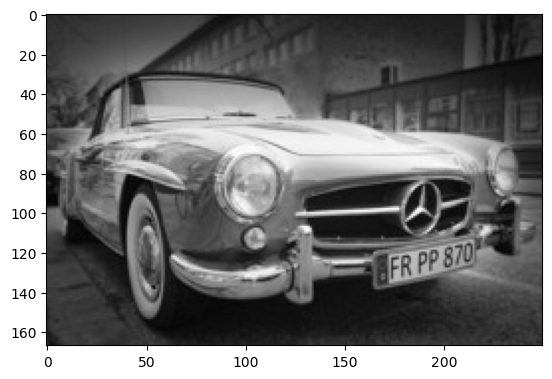

In [5]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

image = Image.open('Car.jpg')
plt.imshow(image, cmap='gray')

# Get the pixel dimensions (width and height) of the image
width, height = image.size

# Print the dimensions
print(f"Width: {width} pixels")
print(f"Height: {height} pixels")

In [8]:
image_matrix = np.array(image)
print(image_matrix)

[[41 39 40 ... 41 38 38]
 [41 38 38 ... 32 38 38]
 [42 40 39 ... 33 32 33]
 ...
 [29 25 27 ... 42 43 43]
 [38 25 20 ... 37 36 36]
 [46 28 16 ... 49 44 44]]


In [10]:
# Slicing
sub_matrix = image_matrix[60:160, 50:250]  # Slice rows and columns 1 to 2
print(sub_matrix)

[[186 188 185 ...  48  54  60]
 [185 181 175 ...  53  50  52]
 [136 130 144 ...  44  46  46]
 ...
 [ 28  16  10 ...  44  49  51]
 [ 41  28  20 ...  37  43  46]
 [ 45  40  31 ...  39  44  48]]


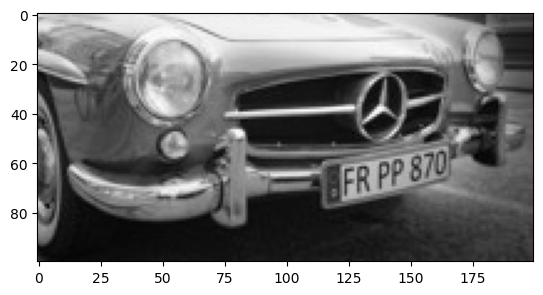

In [11]:
image = Image.fromarray(sub_matrix)
plt.imshow(image, cmap='gray')

In [12]:
# Applying functions to all elements
square_matrix = np.square(sub_matrix)
print(square_matrix)

[[ 36  16 177 ...   0 100  16]
 [177 249 161 ... 249 196 144]
 [ 64   4   0 ... 144  68  68]
 ...
 [ 16   0 100 ... 144  97  41]
 [145  16 144 ...  89  57  68]
 [233  64 193 ... 241 144   0]]
